In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\presentation\\reimbursement_written_prescriptions_2024.csv'
dataset = pd.read_csv(path)

In [3]:
dataset.head(15)

,date_upd,division_area,division_settlement_type,division_settlement,division_settlement_koatuu,legal_entity_id,innms_groups,innms_name,date_period,count_prescription
0,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Опіоїдні анальгетики,морфін,2024-08,2
1,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Опіоїдні анальгетики,морфін,2024-11,1
2,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Опіоїдні анальгетики,морфін,2024-12,1
3,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-01,216
4,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-02,216
5,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-03,185
6,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-04,229
7,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-05,246
8,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-06,168
9,2025-01-20,ВІННИЦЬКА,місто,БАР,520210100.0,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-07,180


In [4]:
dataset.tail(15)

,date_upd,division_area,division_settlement_type,division_settlement,division_settlement_koatuu,legal_entity_id,innms_groups,innms_name,date_period,count_prescription
1097024,2025-01-20,ЧЕРНІГІВСЬКА,смт,СОСНИЦЯ,7.424955e+09,fba3a241-6cb5-48dc-af86-0d9747cb1a14,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-12,1
1097025,2025-01-20,ЧЕРНІГІВСЬКА,смт,СОСНИЦЯ,7.424955e+09,fba3a241-6cb5-48dc-af86-0d9747cb1a14,Медичні вироби для визначення рівня глюкози в ...,Реагент швидкого тестування на глюкозу,2024-01,3
1097026,2025-01-20,ЧЕРНІГІВСЬКА,смт,СОСНИЦЯ,7.424955e+09,fba3a241-6cb5-48dc-af86-0d9747cb1a14,Медичні вироби для визначення рівня глюкози в ...,Реагент швидкого тестування на глюкозу,2024-02,2
1097027,2025-01-20,ЧЕРНІГІВСЬКА,смт,ТАЛАЛАЇВКА,7.425355e+09,fe344a3b-ed1a-43e9-8a8e-06d8df235c3a,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-03,2
1097028,2025-01-20,ЧЕРНІГІВСЬКА,смт,ТАЛАЛАЇВКА,7.425355e+09,fe344a3b-ed1a-43e9-8a8e-06d8df235c3a,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-04,1
1097029,2025-01-20,ЧЕРНІГІВСЬКА,смт,ТАЛАЛАЇВКА,7.425355e+09,fe344a3b-ed1a-43e9-8a8e-06d8df235c3a,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-05,3
1097030,2025-01-20,ЧЕРНІГІВСЬКА,смт,ТАЛАЛАЇВКА,7.425355e+09,fe344a3b-ed1a-43e9-8a8e-06d8df235c3a,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-06,2
1097031,2025-01-20,ЧЕРНІГІВСЬКА,смт,ТАЛАЛАЇВКА,7.425355e+09,fe344a3b-ed1a-43e9-8a8e-06d8df235c3a,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-07,3
1097032,2025-01-20,ЧЕРНІГІВСЬКА,смт,ТАЛАЛАЇВКА,7.425355e+09,fe344a3b-ed1a-43e9-8a8e-06d8df235c3a,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-08,3
1097033,2025-01-20,ЧЕРНІГІВСЬКА,смт,ТАЛАЛАЇВКА,7.425355e+09,fe344a3b-ed1a-43e9-8a8e-06d8df235c3a,Медичні вироби для визначення рівня глюкози в ...,"Глюкоза IVD (діагностика in vitro), реагент",2024-09,1


In [5]:
dataset.columns.values

array(['date_upd', 'division_area', 'division_settlement_type',
       'division_settlement', 'division_settlement_koatuu',
       'legal_entity_id', 'innms_groups', 'innms_name', 'date_period',
       'count_prescription'], dtype=object)

In [6]:
df = dataset.drop(['date_upd', 'division_settlement_koatuu'], axis=1).copy()
df.head()

,division_area,division_settlement_type,division_settlement,legal_entity_id,innms_groups,innms_name,date_period,count_prescription
0,ВІННИЦЬКА,місто,БАР,8cb4cd14-569d-43b3-a424-49763b74c45f,Опіоїдні анальгетики,морфін,2024-08,2
1,ВІННИЦЬКА,місто,БАР,8cb4cd14-569d-43b3-a424-49763b74c45f,Опіоїдні анальгетики,морфін,2024-11,1
2,ВІННИЦЬКА,місто,БАР,8cb4cd14-569d-43b3-a424-49763b74c45f,Опіоїдні анальгетики,морфін,2024-12,1
3,ВІННИЦЬКА,місто,БАР,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-01,216
4,ВІННИЦЬКА,місто,БАР,8cb4cd14-569d-43b3-a424-49763b74c45f,Профілактика інфарктів та інсультів,Ацетилсаліцилова кислота,2024-02,216


In [7]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1097034    False
1097035    False
1097036    False
1097037    False
1097038    False
Length: 1097039, dtype: bool

In [8]:
df[df.duplicated()]

,division_area,division_settlement_type,division_settlement,legal_entity_id,innms_groups,innms_name,date_period,count_prescription
318872,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Амлодипін,2024-03,1
318913,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Еналаприл,2024-07,3
318915,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Еналаприл,2024-09,1
318924,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Карведилол,2024-06,2
318937,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Клопідогрель,2024-07,2
318957,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Метопролол,2024-04,2
318959,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Метопролол,2024-08,1
318978,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Спіронолактон,2024-03,1
318986,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Спіронолактон,2024-12,2
318987,ЗАПОРІЗЬКА,місто,ЗАПОРІЖЖЯ,494b9b39-7ae3-42ee-8545-5d88f3a12b74,Серцево-судинні захворювання,Фуросемід,2024-06,1


In [9]:
len(df)-len(df.drop_duplicates())

17

In [10]:
df.isna().sum()

division_area               0
division_settlement_type    0
division_settlement         0
legal_entity_id             0
innms_groups                0
innms_name                  0
date_period                 0
count_prescription          0
dtype: int64

In [11]:
df.dtypes

division_area               object
division_settlement_type    object
division_settlement         object
legal_entity_id             object
innms_groups                object
innms_name                  object
date_period                 object
count_prescription           int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097039 entries, 0 to 1097038
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   division_area             1097039 non-null  object
 1   division_settlement_type  1097039 non-null  object
 2   division_settlement       1097039 non-null  object
 3   legal_entity_id           1097039 non-null  object
 4   innms_groups              1097039 non-null  object
 5   innms_name                1097039 non-null  object
 6   date_period               1097039 non-null  object
 7   count_prescription        1097039 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 67.0+ MB


In [13]:
df.describe()

,count_prescription
count,1.097039e+06
mean,1.438519e+01
std,4.478144e+01
min,1.000000e+00
25%,1.000000e+00
50%,4.000000e+00
75%,1.000000e+01
max,1.880000e+03


In [14]:
df['division_area'].unique()

array(['ВІННИЦЬКА', 'ВОЛИНСЬКА', 'ДНІПРОПЕТРОВСЬКА', 'ДОНЕЦЬКА',
       'ЖИТОМИРСЬКА', 'ЗАКАРПАТСЬКА', 'ЗАПОРІЗЬКА', 'ІВАНО-ФРАНКІВСЬКА',
       'КИЇВСЬКА', 'КІРОВОГРАДСЬКА', 'ЛУГАНСЬКА', 'ЛЬВІВСЬКА',
       'МИКОЛАЇВСЬКА', 'М.КИЇВ', 'ОДЕСЬКА', 'ПОЛТАВСЬКА', 'РІВНЕНСЬКА',
       'СУМСЬКА', 'ТЕРНОПІЛЬСЬКА', 'ХАРКІВСЬКА', 'ХЕРСОНСЬКА',
       'ХМЕЛЬНИЦЬКА', 'ЧЕРКАСЬКА', 'ЧЕРНІВЕЦЬКА', 'ЧЕРНІГІВСЬКА'],
      dtype=object)

In [15]:
df['division_area'].value_counts()

division_area
ДНІПРОПЕТРОВСЬКА     88769
ЛЬВІВСЬКА            85274
ОДЕСЬКА              67826
КИЇВСЬКА             65345
ХАРКІВСЬКА           63227
ЗАКАРПАТСЬКА         63101
ВІННИЦЬКА            62974
ПОЛТАВСЬКА           57019
ІВАНО-ФРАНКІВСЬКА    54291
ХМЕЛЬНИЦЬКА          47221
РІВНЕНСЬКА           44432
ЖИТОМИРСЬКА          42760
ТЕРНОПІЛЬСЬКА        42354
ЧЕРКАСЬКА            41512
ЧЕРНІВЕЦЬКА          37919
СУМСЬКА              36563
КІРОВОГРАДСЬКА       35274
ВОЛИНСЬКА            35185
ЧЕРНІГІВСЬКА         29335
МИКОЛАЇВСЬКА         27731
М.КИЇВ               26984
ЗАПОРІЗЬКА           19497
ДОНЕЦЬКА             14659
ХЕРСОНСЬКА            7313
ЛУГАНСЬКА              474
Name: count, dtype: int64

In [16]:
df['division_settlement_type'].unique()

array(['місто', 'селище', 'село', 'смт'], dtype=object)

In [17]:
df['division_settlement_type'].value_counts()

division_settlement_type
село      467503
місто     446293
смт       172052
селище     11191
Name: count, dtype: int64

In [18]:
df['division_settlement'].unique()

array(['БАР', 'БЕРШАДЬ', 'Вінниця', ..., 'Холми', 'ЯСЕНИЦЯ-СІЛЬНА',
       'БЕРЕЗНА'], dtype=object)

In [19]:
df['division_settlement'].value_counts()

division_settlement
КИЇВ              24003
ХАРКІВ            16538
ДНІПРО            16147
ОДЕСА             16114
КРИВИЙ РІГ        13461
                  ...  
Устилуг               1
СУХА КАЛИГІРКА        1
Окни                  1
ЯСЕНИЦЯ-СІЛЬНА        1
БЕРЕЗНА               1
Name: count, Length: 3478, dtype: int64

In [20]:
df['division_settlement'] = df['division_settlement'].str.upper()
df['division_settlement'].unique()

array(['БАР', 'БЕРШАДЬ', 'ВІННИЦЯ', ..., 'ХОЛМИ', 'ЯСЕНИЦЯ-СІЛЬНА',
       'БЕРЕЗНА'], dtype=object)

In [21]:
df['division_settlement'].value_counts()

division_settlement
КИЇВ              26984
ДНІПРО            17527
ОДЕСА             17261
ХАРКІВ            16860
КРИВИЙ РІГ        14984
                  ...  
КРАСНЕНЬКЕ            1
БЕРДЯНСЬК             1
ГОРОШИНЕ              1
ЯСЕНИЦЯ-СІЛЬНА        1
БЕРЕЗНА               1
Name: count, Length: 3206, dtype: int64

In [22]:
df[df.duplicated()]

,division_area,division_settlement_type,division_settlement,legal_entity_id,innms_groups,innms_name,date_period,count_prescription
7252,ВІННИЦЬКА,місто,ВІННИЦЯ,a1fbec21-3212-411c-a694-b2115200bc10,Серцево-судинні захворювання,Амлодипін,2024-11,2
7261,ВІННИЦЬКА,місто,ВІННИЦЯ,a1fbec21-3212-411c-a694-b2115200bc10,Серцево-судинні захворювання,Гідрохлортіазид,2024-10,1
7265,ВІННИЦЬКА,місто,ВІННИЦЯ,a1fbec21-3212-411c-a694-b2115200bc10,Серцево-судинні захворювання,Дигоксин,2024-12,1
7268,ВІННИЦЬКА,місто,ВІННИЦЯ,a1fbec21-3212-411c-a694-b2115200bc10,Серцево-судинні захворювання,Карведилол,2024-10,2
7270,ВІННИЦЬКА,місто,ВІННИЦЯ,a1fbec21-3212-411c-a694-b2115200bc10,Серцево-судинні захворювання,Карведилол,2024-12,3
...,...,...,...,...,...,...,...,...
1072665,ЧЕРНІГІВСЬКА,місто,ЧЕРНІГІВ,91bfb2e2-b246-46e9-b8c8-95957e576657,Психічні розлади. Епілепсія,Карбамазепін,2024-10,3
1072666,ЧЕРНІГІВСЬКА,місто,ЧЕРНІГІВ,91bfb2e2-b246-46e9-b8c8-95957e576657,Психічні розлади. Епілепсія,Карбамазепін,2024-12,1
1072667,ЧЕРНІГІВСЬКА,місто,ЧЕРНІГІВ,91bfb2e2-b246-46e9-b8c8-95957e576657,Психічні розлади. Епілепсія,Ламотриджин,2024-01,5
1072668,ЧЕРНІГІВСЬКА,місто,ЧЕРНІГІВ,91bfb2e2-b246-46e9-b8c8-95957e576657,Психічні розлади. Епілепсія,Ламотриджин,2024-02,2


In [23]:
len(df)-len(df.drop_duplicates())

173

In [24]:
df = df.drop_duplicates()
len(df)-len(df.drop_duplicates())

0

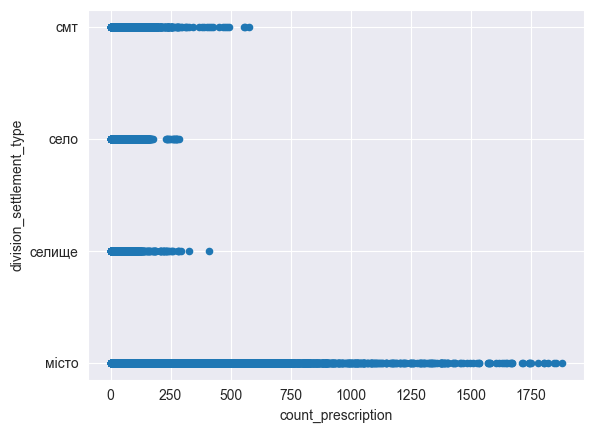

In [25]:
axes = df.plot(kind = 'scatter', x = 'count_prescription', y = 'division_settlement_type')

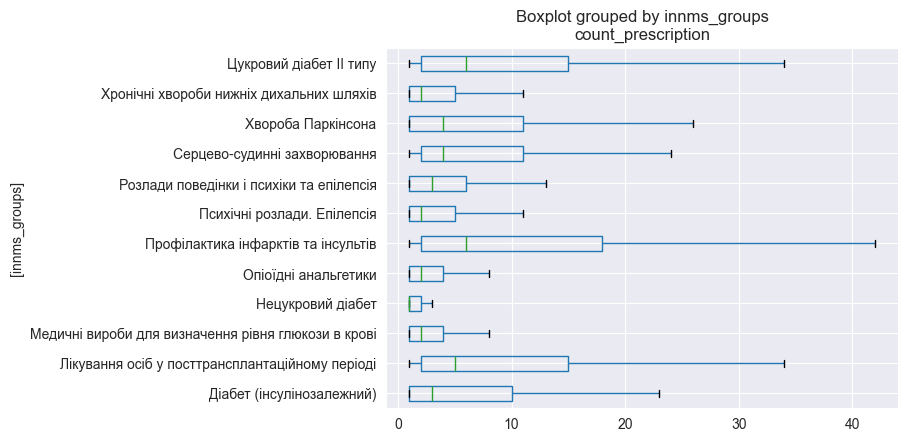

In [26]:
df.boxplot(by='innms_groups', showfliers=False, vert=False)
plt.show()

In [27]:
df.loc[:,['innms_groups', 'count_prescription']].groupby('innms_groups').ngroups

12

In [28]:
df.groupby('innms_groups')["count_prescription"].sum()

innms_groups
Діабет (інсулінозалежний)                              1363653
Лікування осіб у посттрансплантаційному періоді          16854
Медичні вироби для визначення рівня глюкози в крові      35675
Нецукровий діабет                                         8312
Опіоїдні анальгетики                                     22585
Профілактика інфарктів та інсультів                    2199884
Психічні розлади. Епілепсія                             189316
Розлади поведінки і психіки та епілепсія                 29881
Серцево-судинні захворювання                           8310177
Хвороба Паркінсона                                      120501
Хронічні хвороби нижніх дихальних шляхів               1128667
Цукровий діабет II типу                                2354964
Name: count_prescription, dtype: int64

In [29]:
def ToFactor(org_df, new_df, col):
    labels, _ = pd.factorize(org_df[col])
    new_df.loc[:,[col]] = labels

In [30]:
df_mod = df[['division_area', 'division_settlement_type', 'innms_groups', 'count_prescription']].copy()
ToFactor(df, df_mod, "division_area")
ToFactor(df, df_mod, "division_settlement_type")
ToFactor(df, df_mod, "innms_groups")

In [31]:
df_mod.head(15)

,division_area,division_settlement_type,innms_groups,count_prescription
0,0,0,0,2
1,0,0,0,1
2,0,0,0,1
3,0,0,1,216
4,0,0,1,216
5,0,0,1,185
6,0,0,1,229
7,0,0,1,246
8,0,0,1,168
9,0,0,1,180


In [32]:
df_mod.tail(15)

,division_area,division_settlement_type,innms_groups,count_prescription
1097024,24,3,11,1
1097025,24,3,11,3
1097026,24,3,11,2
1097027,24,3,11,2
1097028,24,3,11,1
1097029,24,3,11,3
1097030,24,3,11,2
1097031,24,3,11,3
1097032,24,3,11,3
1097033,24,3,11,1


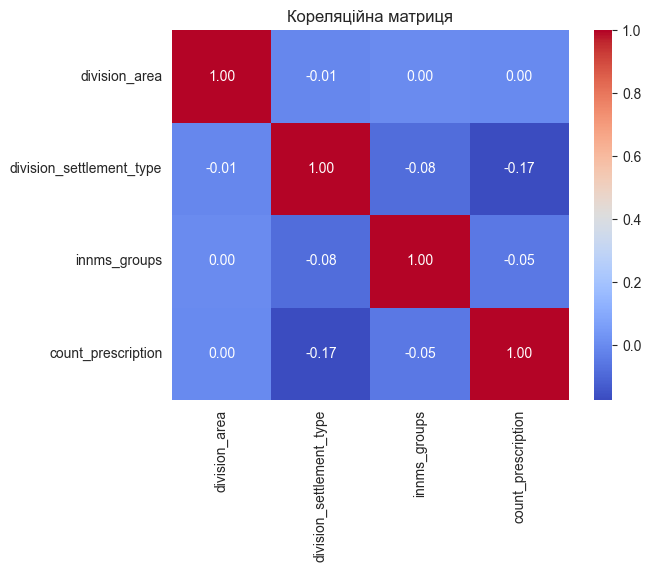

In [33]:
corr_matrix = df_mod[['division_area', 'division_settlement_type', 'innms_groups', 'count_prescription']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

In [34]:
X = df_mod.loc[:, df_mod.columns != 'count_prescription']
Y = df_mod['count_prescription']

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.57869866, -1.14771832, -2.39420411],
       [-1.57869866, -1.14771832, -2.39420411],
       [-1.57869866, -1.14771832, -2.39420411],
       ...,
       [ 1.76379658,  1.43489689,  3.04743992],
       [ 1.76379658,  1.43489689,  3.04743992],
       [ 1.76379658,  1.43489689,  3.04743992]])

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=11)

In [37]:
X_train.shape

(822649, 3)

In [38]:
X_test.shape

(274217, 3)

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [40]:
predicted = lin_reg.predict(X_test)
expected = Y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 24.85, expected: 2.00
predicted: -6.05, expected: 1.00
predicted: 24.79, expected: 2.00
predicted: 24.76, expected: 7.00
predicted: 29.23, expected: 2.00
predicted: 11.00, expected: 12.00
predicted: 11.07, expected: 2.00
predicted: 8.16, expected: 1.00
predicted: 20.39, expected: 9.00
predicted: 18.92, expected: 4.00
predicted: 11.10, expected: 3.00
predicted: 24.82, expected: 10.00
predicted: 24.76, expected: 13.00
predicted: 18.96, expected: 10.00
predicted: 24.81, expected: 3.00
predicted: 15.40, expected: 1.00
predicted: 11.01, expected: 3.00
predicted: 11.07, expected: 2.00
predicted: 2.75, expected: 16.00
predicted: 24.87, expected: 35.00
predicted: 5.19, expected: 2.00
predicted: 24.85, expected: 7.00
predicted: 10.99, expected: 1.00
predicted: 10.98, expected: 10.00
predicted: 8.13, expected: 1.00
predicted: 21.85, expected: 3.00
predicted: 10.95, expected: 8.00
predicted: 4.19, expected: 4.00
predicted: 1.27, expected: 5.00
predicted: 29.18, expected: 2.00
predicted

In [41]:
mean_squared_error(Y_test, predicted)

1938.414660539531

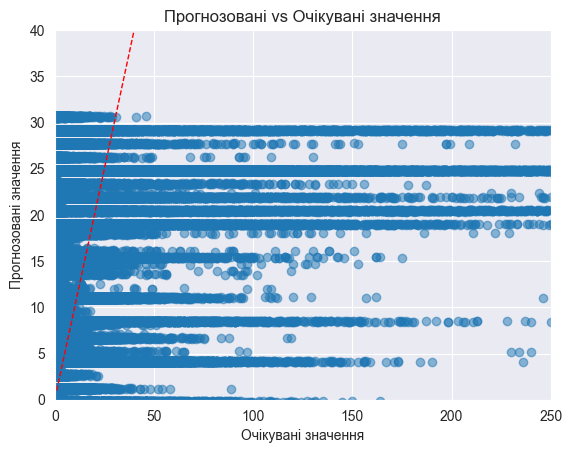

In [42]:
plt.scatter(Y_test, predicted, alpha=0.5)
plt.xlabel('Очікувані значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Очікувані значення')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1)
plt.xlim(0, 250)
plt.ylim(0, 40)
plt.show()